In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
path = '12 classes/train'

In [3]:
actors  = os.listdir(path)

In [ ]:
print(os.getcwd())

In [ ]:
os.chdir('Scripts/MyFiles')

In [4]:
train_path = '12 classes/train'
test_path = '12 classes/test'
val_path = '12 classes/val'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=train_path, target_size=(224,224), classes=actors, batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=val_path, target_size=(224,224), classes=actors, batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=test_path, target_size=(224,224), classes=actors, batch_size=10, shuffle=False)

Found 3952 images belonging to 12 classes.
Found 1130 images belonging to 12 classes.
Found 564 images belonging to 12 classes.


In [ ]:
imgs, labels = next(train_batches)

In [17]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
plotImages(imgs)
print(labels)

# Train

In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), 1, padding = 'same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, padding = 'same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, padding = 'same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, padding = 'same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), 1, padding = 'same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dropout(.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(12, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [8]:
model.compile(optimizer=Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
logdir='logs'

In [10]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [11]:
#Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("celebrities_simplemodel_12classes.h5", save_best_only=True)

In [12]:
hist = model.fit(x=train_batches, validation_data=valid_batches, epochs=30, verbose=2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/30
396/396 - 182s - loss: 2.9047 - accuracy: 0.1379 - val_loss: 2.2559 - val_accuracy: 0.2558 - 182s/epoch - 460ms/step
Epoch 2/30
396/396 - 173s - loss: 2.2326 - accuracy: 0.2214 - val_loss: 1.8933 - val_accuracy: 0.3841 - 173s/epoch - 438ms/step
Epoch 3/30
396/396 - 176s - loss: 1.9257 - accuracy: 0.3338 - val_loss: 1.5263 - val_accuracy: 0.5832 - 176s/epoch - 444ms/step
Epoch 4/30
396/396 - 172s - loss: 1.5695 - accuracy: 0.4782 - val_loss: 1.1054 - val_accuracy: 0.6478 - 172s/epoch - 435ms/step
Epoch 5/30
396/396 - 174s - loss: 1.2705 - accuracy: 0.5772 - val_loss: 0.9539 - val_accuracy: 0.7133 - 174s/epoch - 440ms/step
Epoch 6/30
396/396 - 172s - loss: 1.0734 - accuracy: 0.6501 - val_loss: 0.7585 - val_accuracy: 0.7858 - 172s/epoch - 436ms/step
Epoch 7/30
396/396 - 174s - loss: 0.8702 - accuracy: 0.7166 - val_loss: 0.6906 - val_accuracy: 0.7788 - 174s/epoch - 438ms/step
Epoch 8/30
396/396 - 172s - loss: 0.7638 - accuracy: 0.7576 - val_loss: 0.6303 - val_accuracy: 0.8106 - 

# 8. Plot Performance

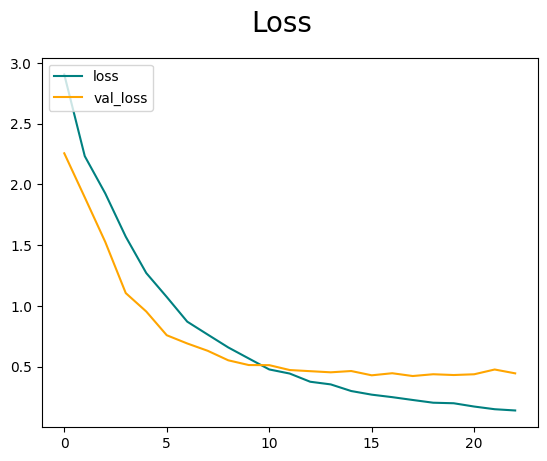

In [13]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

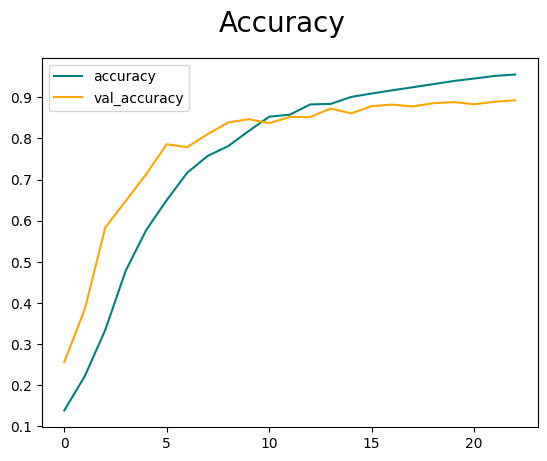

In [15]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

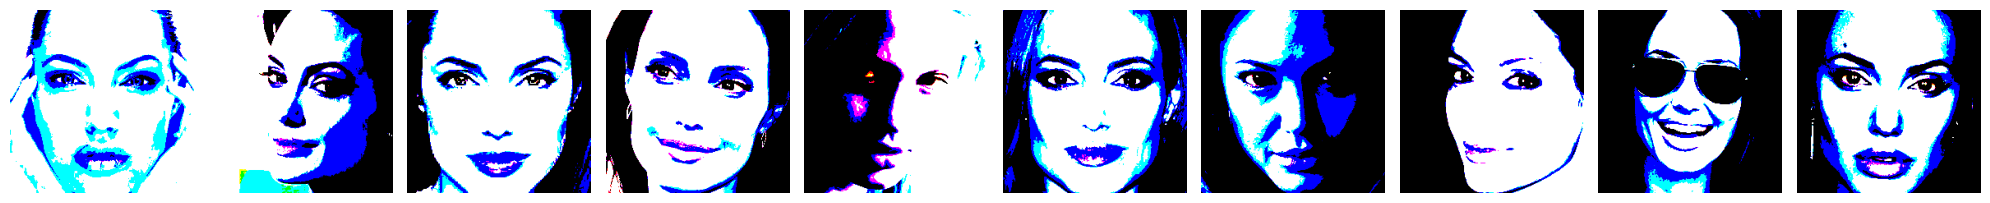

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [18]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [19]:
test_labels = test_batches.classes
test_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4

In [20]:
predictions = model.predict(x=test_batches, verbose=0)

In [21]:
rounded_predictions = np.argmax(predictions, axis = 1)
rounded_predictions

array([ 0,  0,  0,  0,  0,  6,  0,  0,  0, 10,  8,  0,  0,  0,  6,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  7,  1,  1,  1,  1,
        9,  1,  1,  1,  1,  1,  1,  1,  1,  9,  9,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  6,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  1,  2,  2,  3,  3,  3,  3,  3,  2,  3,  3,
        3,  3,  3,  3,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  7,  3,  3,
        3,  3,  5,  4,  7,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  1,  4,  2,  2,  4,  4,  4,
        4,  4,  4,  1,  4

## Confusion Matrix

In [22]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [23]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [24]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
        
    print(cm)
    
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else 'black')
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        

Confusion matrix, without normalization
[[46  0  0  0  0  0  3  0  1  1  1  0]
 [ 0 39  1  0  0  0  1  1  0  3  0  0]
 [ 0  1 47  0  0  0  0  0  0  0  0  0]
 [ 0  1  1 42  3  1  0  2  0  0  0  0]
 [ 0  4  3  1 44  0  0  0  0  0  0  0]
 [ 0  1  0  0  0 49  1  1  0  0  0  0]
 [ 1  0  0  0  0  0 42  1  1  1  0  0]
 [ 1  2  0  0  1  0  0 41  0  0  0  0]
 [ 2  0  0  0  0  0  1  0 38  0  5  0]
 [ 0  3  0  0  0  0  0  2  0 45  0  0]
 [ 2  0  0  0  0  0  0  1  0  2 53  0]
 [ 0  1  2  0  0  0  0  0  0  1  0 16]]


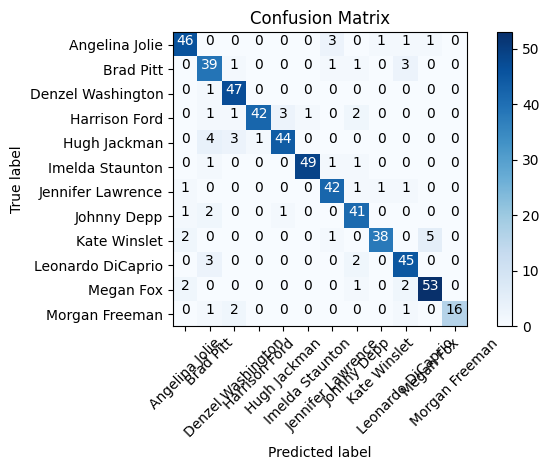

In [25]:
cm_plot_labels = actors
plot_confusion_matrix(cm, classes= cm_plot_labels,title='Confusion Matrix')

## save the model

In [27]:
# Checks first to see if file exists already
# If not, the model is saved to disk
import os.path
if os.path.isfile('models/12classes_simplemodel.h5') is False:
    model.save('models/12classes_simplemodel.h5')